In [14]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys
from pathlib import Path
sys.path.append("../../")
from custom_functions.yolo_data import draw_polygons

In [91]:
# weight = "runs/segment/Word_Det_2/weights/best.pt" ## (SEGMENTATION)
# weight = "runs/detect/train4/weights/best.pt" ## (BBOX)
weight = "runs/detect/Char_Det/weights/best.pt" ## (BBOX)

# weight = "runs/segment/Table_Det/weights/best.pt"
model = YOLO(model=weight)
# res = model.predict(source="../../Data/test/Letters", imgsz=320)

In [119]:
img_paths = list(Path(r"D:/Dropbox/College/ImageToDoc/TRAIN_DATA/cls_Letters/P2/val/images").glob("*.jpeg"))
print(img_paths)
images = [cv2.imread(str(path)) for path in img_paths]

[WindowsPath('D:/Dropbox/College/ImageToDoc/TRAIN_DATA/cls_Letters/P2/val/images/20230305_185816_1.jpeg'), WindowsPath('D:/Dropbox/College/ImageToDoc/TRAIN_DATA/cls_Letters/P2/val/images/20230305_185816_72.jpeg'), WindowsPath('D:/Dropbox/College/ImageToDoc/TRAIN_DATA/cls_Letters/P2/val/images/20230305_185841_102.jpeg'), WindowsPath('D:/Dropbox/College/ImageToDoc/TRAIN_DATA/cls_Letters/P2/val/images/20230326_180924_103.jpeg'), WindowsPath('D:/Dropbox/College/ImageToDoc/TRAIN_DATA/cls_Letters/P2/val/images/20230326_180924_4.jpeg'), WindowsPath('D:/Dropbox/College/ImageToDoc/TRAIN_DATA/cls_Letters/P2/val/images/20230327_232846_41.jpeg'), WindowsPath('D:/Dropbox/College/ImageToDoc/TRAIN_DATA/cls_Letters/P2/val/images/20230327_232846_73.jpeg'), WindowsPath('D:/Dropbox/College/ImageToDoc/TRAIN_DATA/cls_Letters/P2/val/images/20230327_232846_83.jpeg'), WindowsPath('D:/Dropbox/College/ImageToDoc/TRAIN_DATA/cls_Letters/P2/val/images/20230327_232846_88.jpeg'), WindowsPath('D:/Dropbox/College/Imag

In [132]:
# res = model.predict(source="../../Data/test/Tables/20230327_234825.jpeg", imgsz=2000, conf=0.4, iou=0.8)
res = model.predict(source=images, imgsz=320, conf=0.1, iou=0.1)


0: 320x320 1 , 1 , 1 , 1 , 1 , 1: 320x320 1 n, 1 x, 1 4, 2: 320x320 1 , 1 1, 2 2s, 1 ., 3: 320x320 1 5, 4: 320x320 3 s, 1 , 1 , 1 , 1 , 1 , 3 s, 5: 320x320 1 0, 6: 320x320 1 0, 7: 320x320 1 0, 8: 320x320 1 0, 1 1, 9: 320x320 1 n, 10: 320x320 1 0, 11: 320x320 1 , 1 , 1 b, 1 n, 12: 320x320 (no detections), 13: 320x320 1 1, 1 4, 14: 320x320 1 , 1 , 1 , 1 , 1 I, 3 ?s, 211.8ms
Speed: 0.9ms preprocess, 14.1ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 320)


In [133]:
len(res)

15

from pathlib import Path
import numpy as np
p = Path("../../Data/test/Tables")
image_paths = list(p.glob("*"))
img = plt.imread(image_paths[0])
r = model(image_paths[0])

for i in range(len(r[0].masks.data)):
    plt.imshow(r[0].masks.data[i].cpu().numpy().astype(np.uint8))
    plt.show()

In [145]:
np.save("../../weights/classes.npy",np.array(list(res[0].names.values())))

In [150]:
def draw_boxes(img, boxes, names, color=(200,20,10), thickness=4):
    word = ""
    boxes.tolist().sort(key=lambda box: (box[0], box[1]))
    for i, box in enumerate(boxes):
        cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), color=color, thickness=thickness)
        word += names[int(box[-1])]
        print(int(box[-1]))
    print(word)
    return img

# BBOX

38
48
39
70
59
աիբցն


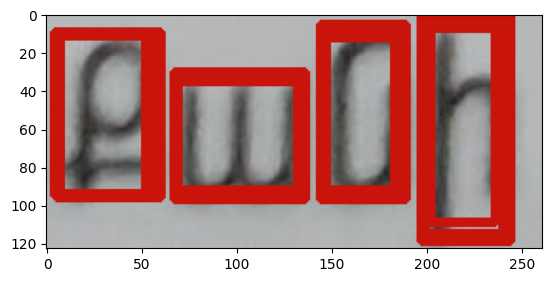

126
133
116
x4n


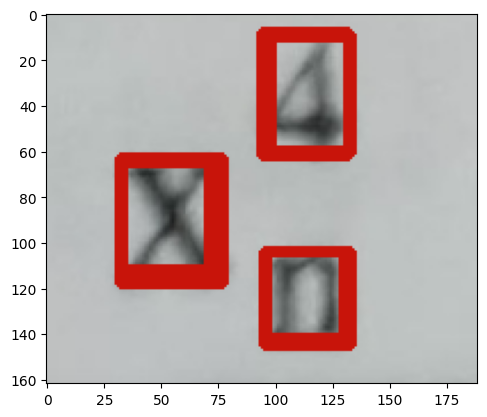

59
130
131
157
131
ն12.2


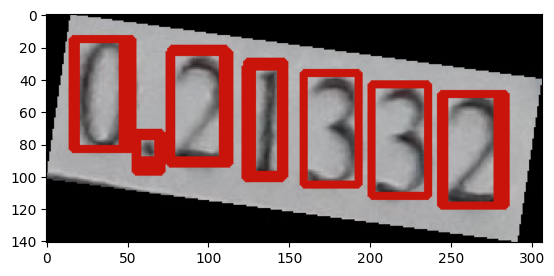

134
5


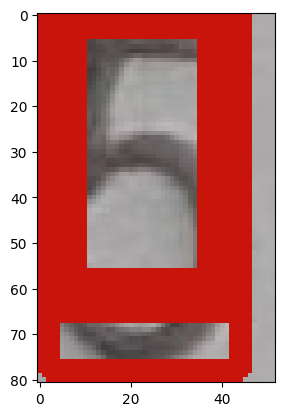

38
38
69
49
38
59
48
69
39
69
52
աարլանիրբրկ


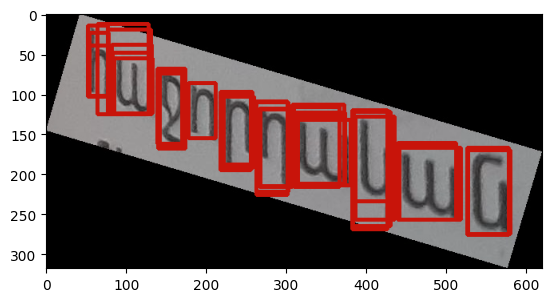

129
0


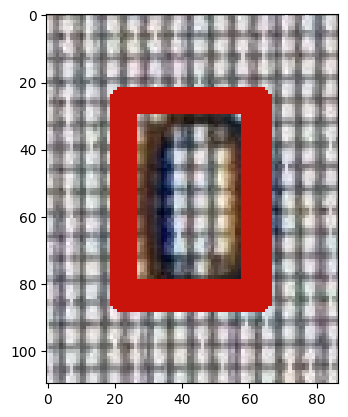

129
0


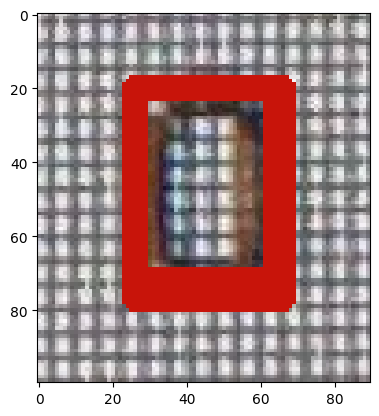

129
0


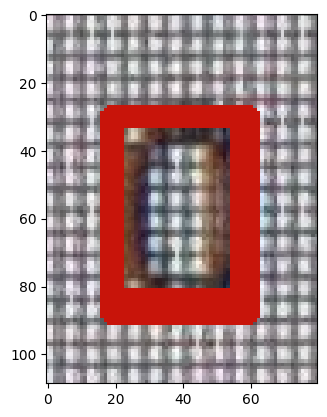

129
130
01


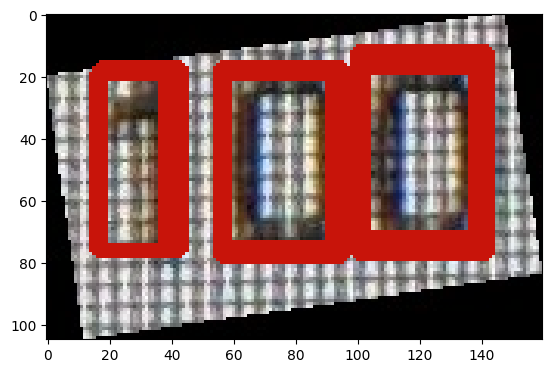

116
n


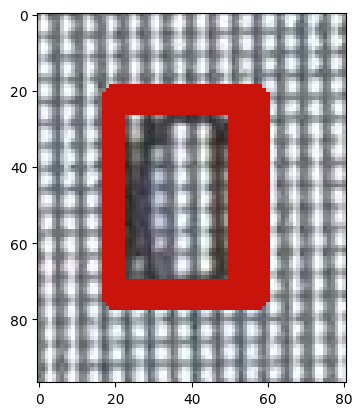

129
0


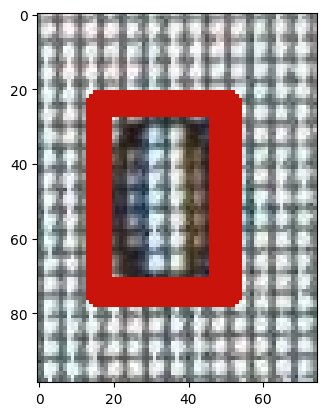

116
45
68
104
nըտb


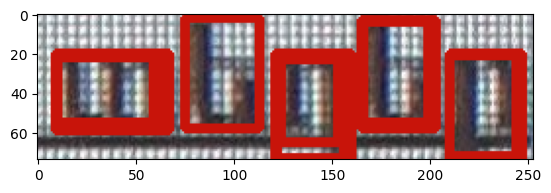

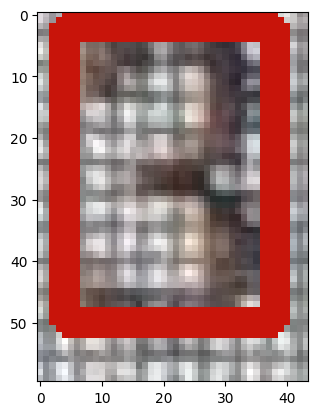

130
133
14


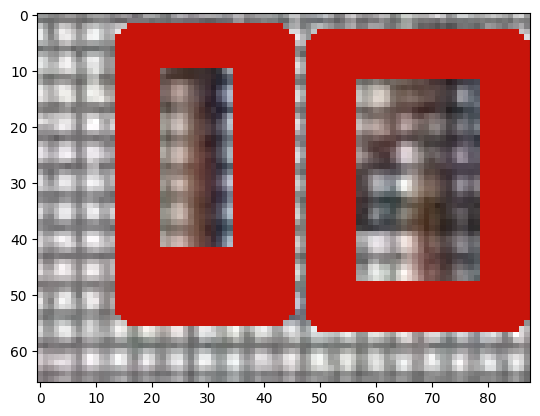

67
172
48
52
172
172
85
39
վ?իկ??Iբ


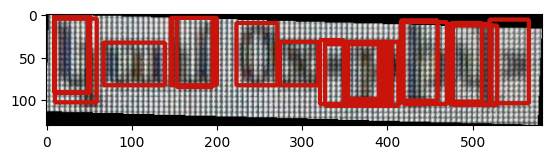

In [151]:
for i,word in enumerate(res[:]):
    boxes = word.boxes.data[:].cpu().numpy().astype(int)
    plt.imshow(draw_boxes(word.orig_img, boxes, res[0].names))
    plt.show()

# Segmentation

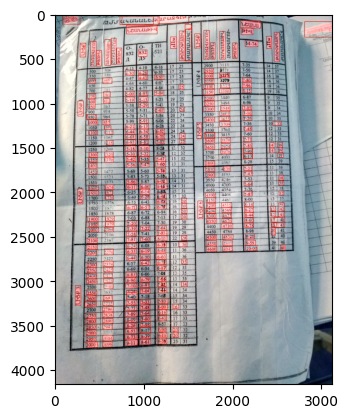

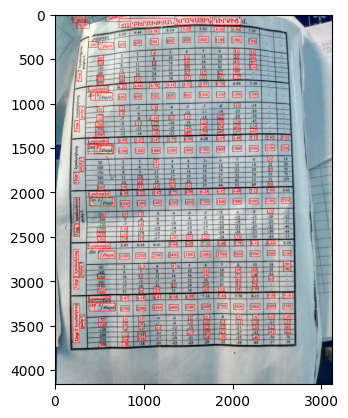

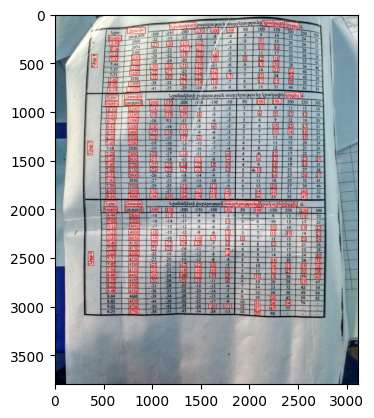

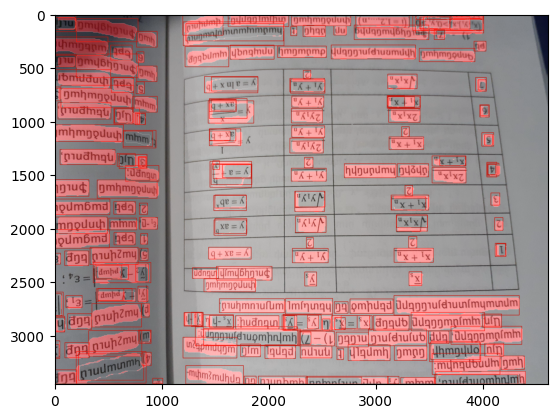

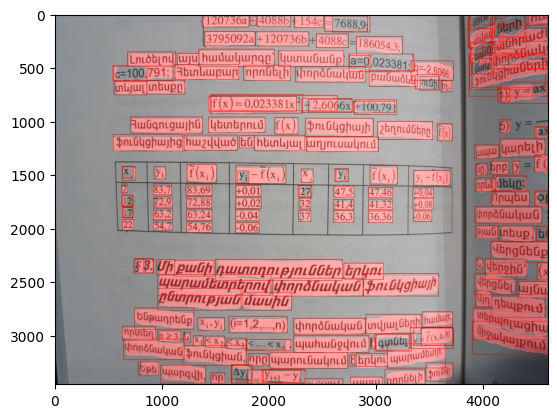

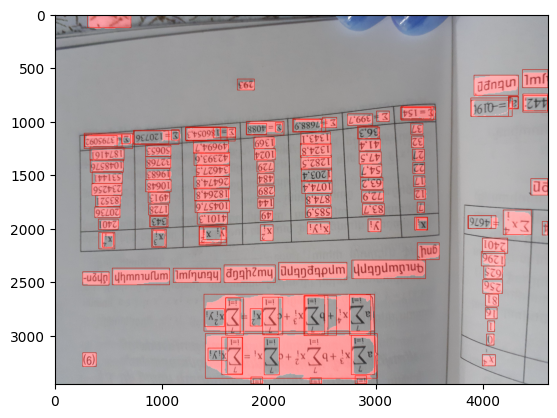

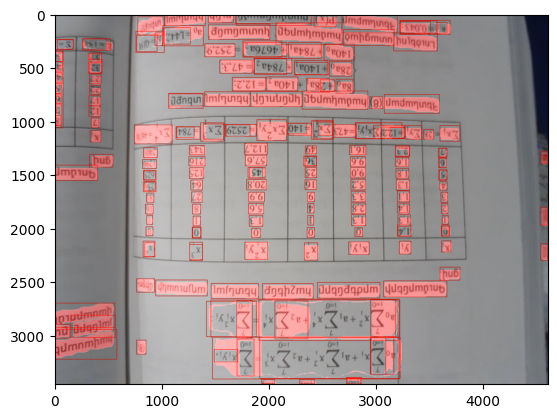

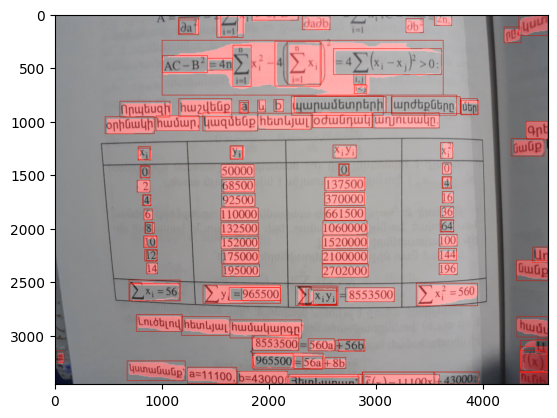

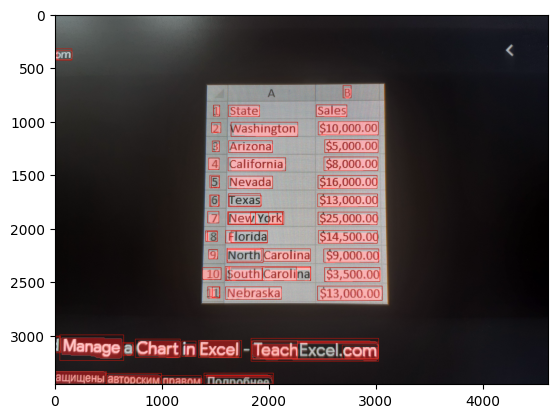

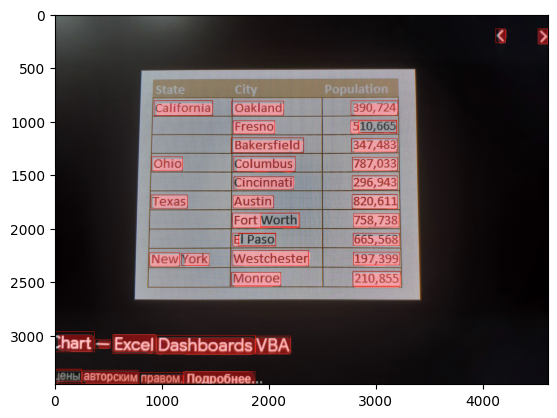

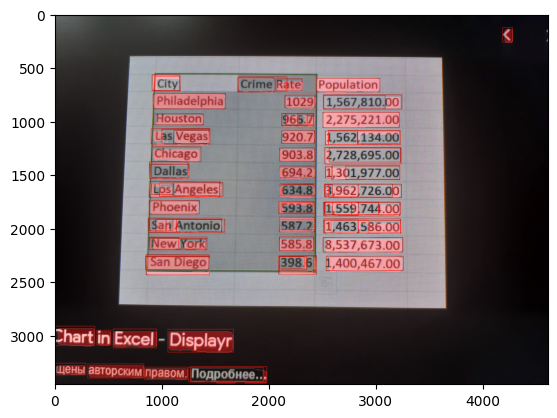

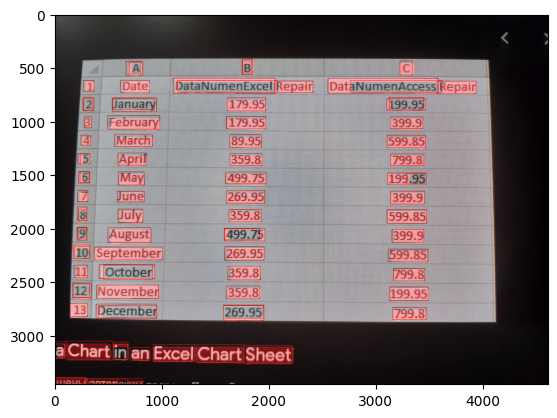

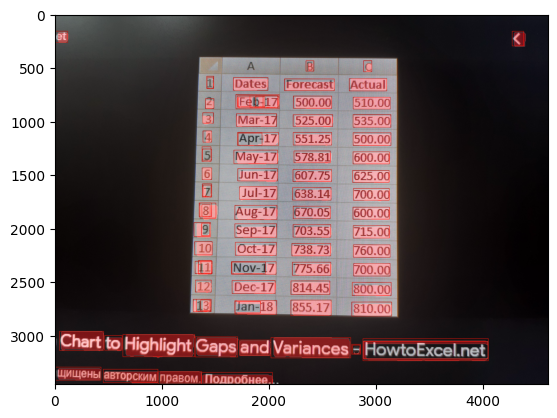

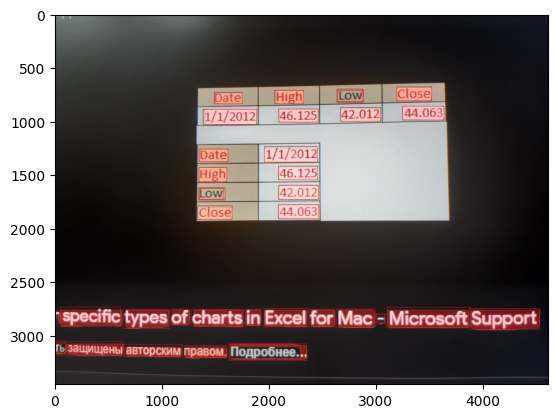

error: Unknown C++ exception from OpenCV code

In [6]:
for i,word in enumerate(res[:]):
    boxes = word.boxes.data[:, :4].cpu().numpy().astype(int)
    polygons = [ (seg*np.array(word.orig_shape[::-1])).astype(int) for seg in word.masks.xyn]
    plt.imshow(draw_polygons(draw_boxes(word.orig_img, boxes), polygons))
    plt.show()